In [1]:
#Import libraries
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [2]:
#Create dataframe
arr = np.array([[1,2,np.nan],[np.nan,3,4]])
dframe1 = DataFrame(arr,index=['A','B'],columns = ['One','Two','Three'])
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [3]:
print("Sum along columns")
dframe1.sum()

Sum along columns


One      1.0
Two      5.0
Three    4.0
dtype: float64

NaN values are ignored

In [4]:
#Sum along rows
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [6]:
#Find out min values of dataframe 
print(dframe1.min(),"\n")
print("Index of min values \n")
print(dframe1.idxmin())

One      1.0
Two      2.0
Three    4.0
dtype: float64 

Index of min values 

One      A
Two      A
Three    B
dtype: object


In [8]:
#Find out max values of dataframe 
print("Max values \n")
print(dframe1.max(),"\n")
print("Index of max values \n")
print(dframe1.idxmax())

Max values 

One      1.0
Two      3.0
Three    4.0
dtype: float64 

Index of max values 

One      A
Two      B
Three    B
dtype: object


However calling all these functions on the data frame dont actually affect the original dataframe.

In [9]:
#Cumulative sum - ignores NaN
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [10]:
print("Summary statistics on dataframe")
dframe1.describe()

Summary statistics on dataframe


,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


### Plotting out correlation and covariance on stock data

In [13]:
#!pip install pandas-datareader

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
mysql-connector-python 8.0.15 requires protobuf>=3.0.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [14]:
import pandas_datareader as pdweb
import datetime

#Use pandas to get closing stock prices from Yahoo for a specific set of companies and time range
prices = pdweb.get_data_yahoo(['CVX','XOM','BP'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2013, 1, 1))['Adj Close']
prices.head()

Symbols,BP,CVX,XOM
Date,,,
2010-01-04,36.873936,56.103920,51.872231
2010-01-05,37.135761,56.501320,52.074772
2010-01-06,37.329029,56.508419,52.524845
2010-01-07,37.316555,56.295525,52.359821
2010-01-08,37.403824,56.394867,52.149780


In [15]:
#Use pandas to get trade volumes from Yahoo for a specific set of companies and time range

volume = pdweb.get_data_yahoo(['CVX','XOM','BP'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2013, 1, 1))['Volume']

volume.head()

Symbols,BP,CVX,XOM
Date,,,
2010-01-04,3956100.0,10173800.0,27809100.0
2010-01-05,4109600.0,10593700.0,30174700.0
2010-01-06,6227900.0,11014600.0,35044700.0
2010-01-07,4431300.0,9626900.0,27192100.0
2010-01-08,3786100.0,5624300.0,24891800.0


In [16]:
#Calculate stock price percent change
rets = prices.pct_change()

In [19]:
#Calculate stock correlation
corr = rets.corr
corr

<bound method DataFrame.corr of Symbols           BP       CVX       XOM
Date                                    
2010-01-04       NaN       NaN       NaN
2010-01-05  0.007101  0.007083  0.003905
2010-01-06  0.005204  0.000126  0.008643
2010-01-07 -0.000334 -0.003767 -0.003142
2010-01-08  0.002339  0.001765 -0.004011
2010-01-11  0.031500  0.017742  0.011220
2010-01-12 -0.006301 -0.005811 -0.004979
2010-01-13  0.004878 -0.007586 -0.004003
2010-01-14 -0.001133 -0.003133  0.000143
2010-01-15 -0.001458 -0.004023 -0.008180
2010-01-19  0.011032  0.005680  0.002315
2010-01-20 -0.020219 -0.019202 -0.017901
2010-01-21 -0.024402 -0.024441 -0.019550
2010-01-22 -0.028538 -0.021642 -0.008996
2010-01-25  0.011751 -0.000536 -0.003782
2010-01-26 -0.001025 -0.005365  0.001063
2010-01-27 -0.007352 -0.006069 -0.005764
2010-01-28 -0.012573 -0.006241 -0.008850
2010-01-29 -0.021106 -0.015292 -0.008159
2010-02-01  0.019779  0.020244  0.027161
2010-02-02 -0.030928  0.011824  0.011786
2010-02-03 -0.005229 -0.0

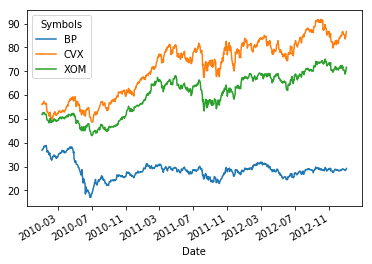

In [24]:
#Plot stock prices over time
%matplotlib inline
prices.plot()

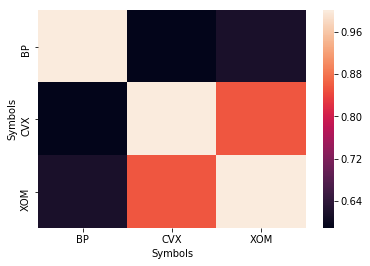

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(rets.corr())

### Unique values

In [30]:
ser1 = Series(['w','w','x', 'y', 'z' ,'w' ,'w' ,'x' ,'x' ,'y' ,'a' ,'z' ])
print(ser1)
print()
print("Unique values")
print(ser1.unique())
print()
print("Unique value counts")
print(ser1.value_counts())

0     w
1     w
2     x
3     y
4     z
5     w
6     w
7     x
8     x
9     y
10    a
11    z
dtype: object

Unique values
['w' 'x' 'y' 'z' 'a']

Unique value counts
w    4
x    3
y    2
z    2
a    1
dtype: int64
